In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Input
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras import optimizers
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
import scipy.stats as stats
from keras.layers import Bidirectional
from keras import callbacks

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
stock='/content/drive/MyDrive/Colab Notebooks/btc_usdt.csv'
data=pd.read_csv(stock)

In [ ]:
data.shape

(1881, 9)

In [ ]:
data.isnull().sum()

Unnamed: 0     0
OpenDate       0
Open           0
High           0
Low            0
Close          0
BaseVolume     0
CloseDate      0
QuoteVolume    0
dtype: int64

In [ ]:
data.head(1881)

,Unnamed: 0,OpenDate,Open,High,Low,Close,BaseVolume,CloseDate,QuoteVolume
0,0,2017-08-18 04:30:00,4285.08,4371.52,3938.77,4108.37,1199.888264,2017-08-19 04:29:59.999,5.086958e+06
1,1,2017-08-19 04:30:00,4108.37,4184.69,3850.00,4139.98,381.309763,2017-08-20 04:29:59.999,1.549484e+06
2,2,2017-08-20 04:30:00,4120.98,4211.08,4032.62,4086.29,467.083022,2017-08-21 04:29:59.999,1.930364e+06
3,3,2017-08-21 04:30:00,4069.13,4119.62,3911.79,4016.00,691.743060,2017-08-22 04:29:59.999,2.797232e+06
4,4,2017-08-22 04:30:00,4016.00,4104.82,3400.00,4040.00,966.684858,2017-08-23 04:29:59.999,3.752506e+06
...,...,...,...,...,...,...,...,...,...
1876,1876,2022-10-07 03:30:00,19960.67,20068.82,19320.00,19530.09,220874.839130,2022-10-08 03:29:59.999,4.353681e+09
1877,1877,2022-10-08 03:30:00,19530.09,19627.38,19237.14,19417.96,102480.098420,2022-10-09 03:29:59.999,1.995917e+09
1878,1878,2022-10-09 03:30:00,19416.52,19558.00,19316.04,19439.02,113900.826810,2022-10-10 03:29:59.999,2.215007e+09
1879,1879,2022-10-10 03:30:00,19439.96,19525.00,19020.25,19131.87,212509.098490,2022-10-11 03:29:59.999,4.101745e+09


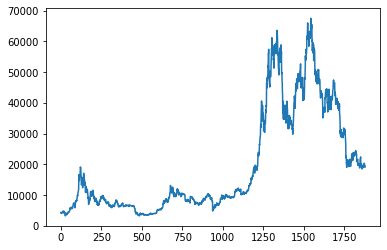

In [ ]:
data1=data.iloc[:,2:3].values
data1
plt.plot(data1)

In [ ]:
data_train = data1[0:np.int16(0.8*data1.shape[0])]
data_test = data1[np.int16(0.8*data1.shape[0]):]

In [ ]:
data_train.mean()
data_z = (data_train-data_train.mean())/(data_train.std())
data_z.mean()

7.558965274043619e-17

In [ ]:
x_train = []
y_train = []

for i in range (5, len(data_z)):
  x_train.append(data_z[i-5:i,0])
  y_train.append(data_z[i,0])
  if i<=10:
    print(x_train)
    print(y_train)
    print()

[array([-0.72892233, -0.74089673, -0.74004223, -0.74355575, -0.74715599])]
[-0.7455296805890546]

[array([-0.72892233, -0.74089673, -0.74004223, -0.74355575, -0.74715599]), array([-0.74089673, -0.74004223, -0.74355575, -0.74715599, -0.74552968])]
[-0.7455296805890546, -0.7382790419218969]

[array([-0.72892233, -0.74089673, -0.74004223, -0.74355575, -0.74715599]), array([-0.74089673, -0.74004223, -0.74355575, -0.74715599, -0.74552968]), array([-0.74004223, -0.74355575, -0.74715599, -0.74552968, -0.73827904])]
[-0.7455296805890546, -0.7382790419218969, -0.7268264209766975]

[array([-0.72892233, -0.74089673, -0.74004223, -0.74355575, -0.74715599]), array([-0.74089673, -0.74004223, -0.74355575, -0.74715599, -0.74552968]), array([-0.74004223, -0.74355575, -0.74715599, -0.74552968, -0.73827904]), array([-0.74355575, -0.74715599, -0.74552968, -0.73827904, -0.72682642])]
[-0.7455296805890546, -0.7382790419218969, -0.7268264209766975, -0.7292184541070776]

[array([-0.72892233, -0.74089673, -0.7

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train

array([[[-0.72892233],
        [-0.74089673],
        [-0.74004223],
        [-0.74355575],
        [-0.74715599]],

       [[-0.74089673],
        [-0.74004223],
        [-0.74355575],
        [-0.74715599],
        [-0.74552968]],

       [[-0.74004223],
        [-0.74355575],
        [-0.74715599],
        [-0.74552968],
        [-0.73827904]],

       ...,

       [[ 1.74097114],
        [ 1.93153961],
        [ 2.02091152],
        [ 1.88168029],
        [ 1.87219686]],

       [[ 1.93153961],
        [ 2.02091152],
        [ 1.88168029],
        [ 1.87219686],
        [ 1.90541901]],

       [[ 2.02091152],
        [ 1.88168029],
        [ 1.87219686],
        [ 1.90541901],
        [ 1.83673785]]])

In [ ]:
from typing import Sequence
model = Sequential()
model.add(Conv1D(32, 1, activation='relu',  input_shape=(x_train.shape[1],1)))
#model.add(MaxPooling1D(pool_size=1))
#model.add(Conv1D(64, 1, activation='relu'))
model.add(Bidirectional(LSTM(64, activation='relu')))
model.add(Dense(1))
model.compile(loss='mean_absolute_error',optimizer='adam')
history=model.fit(x_train,y_train, epochs=100, batch_size=20)

Epoch 1/100
75/75 [==============================] - 4s 9ms/step - loss: 0.1941
Epoch 2/100
75/75 [==============================] - 1s 9ms/step - loss: 0.0519
Epoch 3/100
75/75 [==============================] - 1s 8ms/step - loss: 0.0516
Epoch 4/100
75/75 [==============================] - 1s 8ms/step - loss: 0.0516
Epoch 5/100
75/75 [==============================] - 1s 9ms/step - loss: 0.0476
Epoch 6/100
75/75 [==============================] - 1s 9ms/step - loss: 0.0473
Epoch 7/100
75/75 [==============================] - 1s 8ms/step - loss: 0.0498
Epoch 8/100
75/75 [==============================] - 1s 8ms/step - loss: 0.0458
Epoch 9/100
75/75 [==============================] - 1s 8ms/step - loss: 0.0439
Epoch 10/100
75/75 [==============================] - 1s 8ms/step - loss: 0.0442
Epoch 11/100
75/75 [==============================] - 1s 8ms/step - loss: 0.0443
Epoch 12/100
75/75 [==============================] - 1s 8ms/step - loss: 0.0419
Epoch 13/100
75/75 [=================

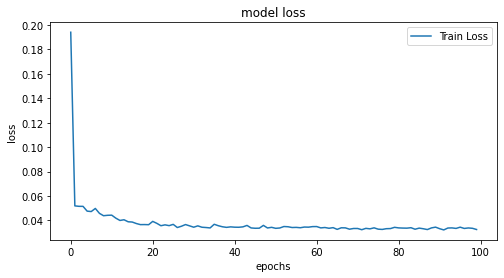

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [ ]:
data_z_test = (data_test-data_train.mean())/(data_train.std())

In [ ]:
x_test = []
y_test = []

for i in range (5, len(data_z_test)):
  x_test.append(data_z_test[i-5:i,0])
  y_test.append(data_z_test[i,0])
  if i<=10:
    print(x_test)
    print(y_test)
    print()

[array([1.79451745, 1.95008227, 2.24292608, 2.2085899 , 2.24688411])]
[2.3163357458671725]

[array([1.79451745, 1.95008227, 2.24292608, 2.2085899 , 2.24688411]), array([1.95008227, 2.24292608, 2.2085899 , 2.24688411, 2.31633575])]
[2.3163357458671725, 2.4686032236561766]

[array([1.79451745, 1.95008227, 2.24292608, 2.2085899 , 2.24688411]), array([1.95008227, 2.24292608, 2.2085899 , 2.24688411, 2.31633575]), array([2.24292608, 2.2085899 , 2.24688411, 2.31633575, 2.46860322])]
[2.3163357458671725, 2.4686032236561766, 2.7290170264998577]

[array([1.79451745, 1.95008227, 2.24292608, 2.2085899 , 2.24688411]), array([1.95008227, 2.24292608, 2.2085899 , 2.24688411, 2.31633575]), array([2.24292608, 2.2085899 , 2.24688411, 2.31633575, 2.46860322]), array([2.2085899 , 2.24688411, 2.31633575, 2.46860322, 2.72901703])]
[2.3163357458671725, 2.4686032236561766, 2.7290170264998577, 2.625354577712525]

[array([1.79451745, 1.95008227, 2.24292608, 2.2085899 , 2.24688411]), array([1.95008227, 2.24292608

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions_r = ((predictions*(data_train.std()))+(data_train.mean()))

In [ ]:
mae = mean_absolute_error(data_test[5:],predictions_r)
mae

1010.664285534274

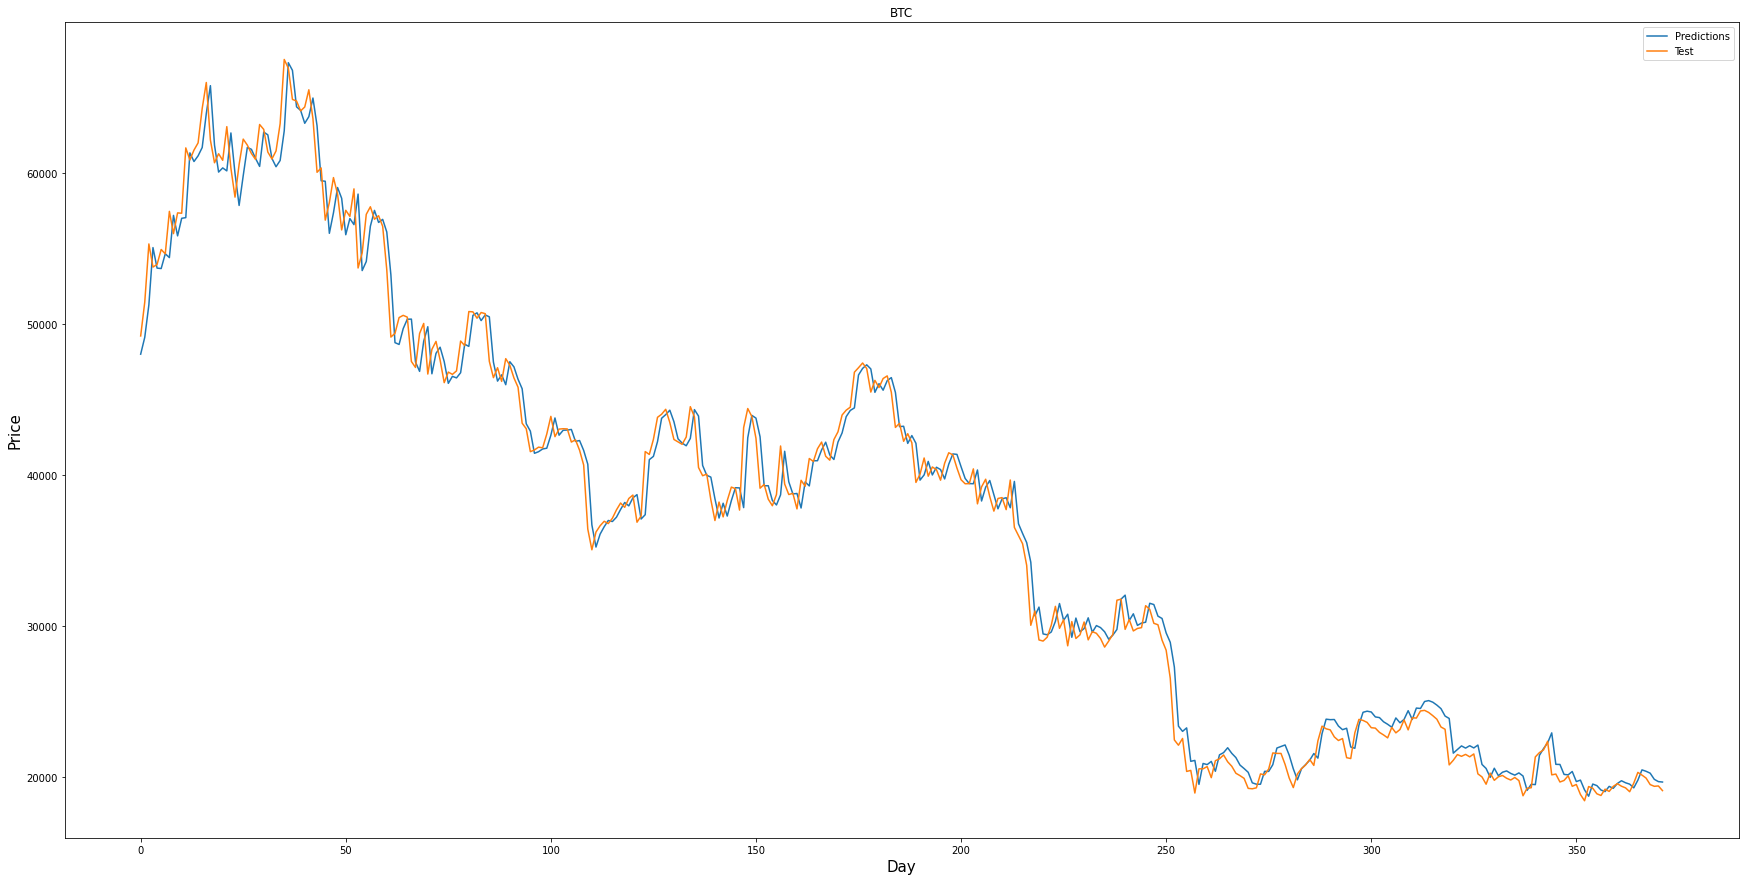

In [ ]:
plt.figure(figsize=(30,15))
plt.plot(predictions_r)
plt.plot(data_test[5:])
plt.title('BTC')
plt.legend(['Predictions','Test'])
plt.ylabel('Price',fontsize = 15)
plt.xlabel('Day',fontsize = 15)
plt.show()